In [1]:
import requests
import pandas as pd

In [2]:
RANK_URL = "https://api.stock.naver.com/ranking/stock/local/total"
response = requests.get(RANK_URL)
response

<Response [200]>

In [3]:
# 필요한 데이터 걸러내는 중
datas = response.json()['datas']

data_list = []

for data in datas:
    ranking = data['ranking']
    reuters_code=float(data['reutersCode'].replace(",",""))
    stock_name=data['stockName']
    close_price=float(data['closePrice'].replace(",",""))
    compare_previous_close_price = float(data['compareToPreviousClosePrice'].replace(",",""))
    acc_trading_volume = float(data['accumulatedTradingVolume'].replace(",",""))
    market_value= data['marketValueHangeul']
    local_traded_at = data['localTradedAt']
    
    fin_data = {
        "순위" : ranking,
        "코드" : reuters_code,
        "종목명": stock_name,
        "종가": close_price,
        "전일종가대비": compare_previous_close_price,
        "누적거래량": acc_trading_volume,
        "시가총액": market_value,
        "거래시각": local_traded_at
    }
    
    data_list.append(fin_data)

In [4]:
df = pd.DataFrame(data_list)
df.head()

,순위,코드,종목명,종가,전일종가대비,누적거래량,시가총액,거래시각
0,1,5930.0,삼성전자,67700.0,-100.0,9020208.0,"404조 1,543억원",2022-04-11T12:20:31+09:00
1,2,35720.0,카카오,95200.0,-2800.0,1178795.0,"42조 4,849억원",2022-04-11T12:20:10+09:00
2,3,11700.0,한신기계,10000.0,-1900.0,10766993.0,"3,245억원",2022-04-11T12:20:30+09:00
3,4,102280.0,쌍방울,947.0,37.0,70512339.0,"2,487억원",2022-04-11T12:20:39+09:00
4,5,1390.0,KG케미칼,40950.0,4150.0,5029185.0,"5,678억원",2022-04-11T12:20:07+09:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      10 non-null     int64  
 1   코드      10 non-null     float64
 2   종목명     10 non-null     object 
 3   종가      10 non-null     float64
 4   전일종가대비  10 non-null     float64
 5   누적거래량   10 non-null     float64
 6   시가총액    10 non-null     object 
 7   거래시각    10 non-null     object 
dtypes: float64(4), int64(1), object(3)
memory usage: 768.0+ bytes


In [6]:
# float(df["코드"].replace(",",""))

In [7]:
KOSPI_URL = "https://m.stock.naver.com/api/index/KOSPI/price?pageSize=10&page=1"
KOSDAQ_URL = "https://m.stock.naver.com/api/index/KOSDAQ/price?pageSize=10&page=1"

In [8]:
kospi_data = requests.get(KOSPI_URL).json()
df_kospi = pd.DataFrame(kospi_data)
df_kospi.head()

,localTradedAt,closePrice,compareToPreviousClosePrice,compareToPreviousPrice,fluctuationsRatio,openPrice,highPrice,lowPrice
0,2022-04-11,"2,687.66",-12.73,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.47,"2,687.54","2,711.02","2,683.96"
1,2022-04-08,"2,700.39",4.53,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.17,"2,706.64","2,712.00","2,685.52"
2,2022-04-07,"2,695.86",-39.17,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-1.43,"2,714.70","2,718.50","2,693.36"
3,2022-04-06,"2,735.03",-24.17,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.88,"2,739.07","2,747.85","2,730.66"
4,2022-04-05,"2,759.20",1.30,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.05,"2,765.50","2,769.18","2,750.50"


In [9]:
kosdaq_data = requests.get(KOSDAQ_URL).json()
df_kosdaq = pd.DataFrame(kosdaq_data)
df_kosdaq.head()

,localTradedAt,closePrice,compareToPreviousClosePrice,compareToPreviousPrice,fluctuationsRatio,openPrice,highPrice,lowPrice
0,2022-04-11,925.15,-9.58,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-1.02,932.48,934.61,924.12
1,2022-04-08,934.73,6.78,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.73,931.98,935.68,924.73
2,2022-04-07,927.95,-15.18,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-1.61,936.92,936.92,925.91
3,2022-04-06,943.13,-9.34,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.98,944.27,947.41,939.82
4,2022-04-05,952.47,5.15,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.54,950.89,953.06,949.46


In [13]:
datas = response.json()[:]# 여기는 키값 넣을 딕셔너리에 키값이 따로 없으니까 이렇게 안해도 됨..

kospi_list =[]

for data in datas:
    local_traded_at = data['localTradedAt']
    close_price= data['closePrice']
    compare_previous_close_price = data['compareToPreviousClosePrice']
    fluctuations_ratio = data['fluctuationsRatio']
    open_price = data['openPrice']
    high_price = data['highPrice']
    low_price = data['lowPrice']
    
    finance_data = {
        "거래일" : localTradedAt,
        "종가" : closePrice,
        "전일대비": compareToPreviousClosePrice,
        "변동비율": fluctuationsRatio,
        "시가": openPrice,
        "고가": highPrice,
        "저가": lowPrice
    }
    
    kospi_list.append(finance_data)

TypeError: unhashable type: 'slice'

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
sns.set()

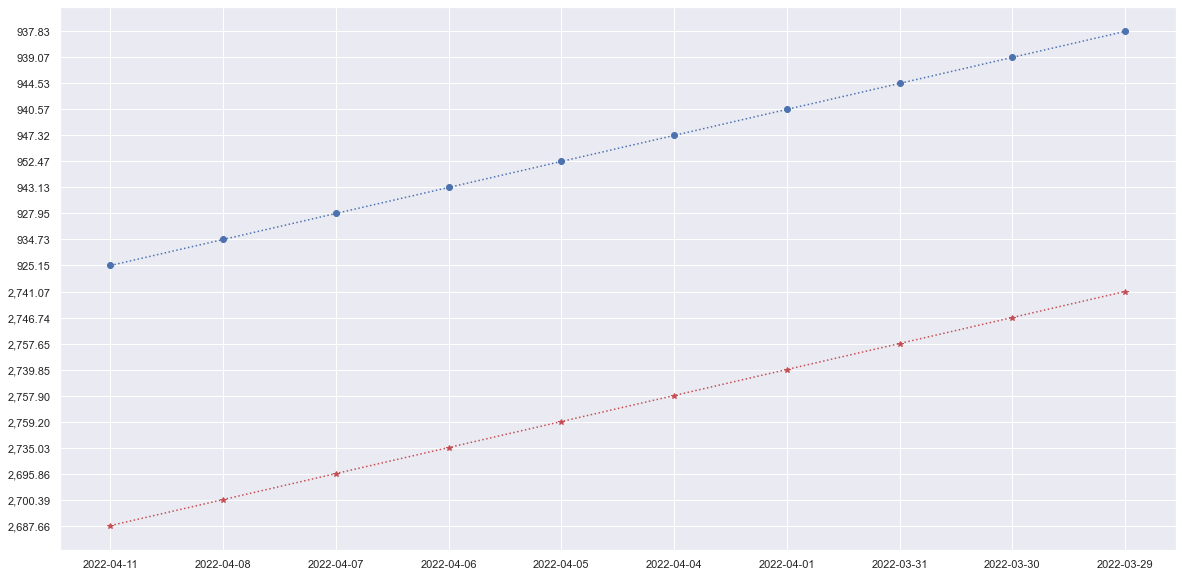

In [16]:
# 일자의 종가 등락 확인
plt.figure(figsize=(20, 10))

plt.plot(df_kospi["localTradedAt"], df_kospi["closePrice"], "r*:", label="kospi")
plt.plot(df_kosdaq["localTradedAt"], df_kosdaq["closePrice"], "bo:", label="kosdaq")

plt.show()

In [17]:
import numpy as np

df_kospi['closePrice']= df_kospi['closePrice'].str.replace(",","")
df_kospi['closePrice']= df_kospi['closePrice'].astype(np.float32)

In [18]:
df_kosdaq['closePrice']= df_kosdaq['closePrice'].str.replace(",","")
df_kosdaq['closePrice']= df_kosdaq['closePrice'].astype(np.float32)

데이터의 정규화와 표준화
* 정규화 Normalization
    - 모든 데이터를 일정한 수치로 맞춰주는 과정
    - 0~1로 데이터를 스케일링
* 표준화 Standard
    - 데이터의 평균을 0으로 맞추고, 표준편차를 1로 맞추는 과정
    - 이상치에 대한 보정
    - 데이터의 분포를 일정하게 맞춰줄 수 있다.

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [20]:
scaler = MinMaxScaler()
df_close_price = df_kospi['closePrice']
df_close_price

0    2687.659912
1    2700.389893
2    2695.860107
3    2735.030029
4    2759.199951
5    2757.899902
6    2739.850098
7    2757.649902
8    2746.739990
9    2741.070068
Name: closePrice, dtype: float32

In [21]:
close_price_scaled = scaler.fit_transform(df_close_price.values.reshape(-1, 1))
close_price_scaled

array([[0.        ],
       [0.17794037],
       [0.11462402],
       [0.6621475 ],
       [1.        ],
       [0.9818268 ],
       [0.7295227 ],
       [0.9783325 ],
       [0.82583237],
       [0.7465744 ]], dtype=float32)

함수로 되어 있는 'minmax_scale' 사용

In [22]:
from sklearn import preprocessing
scaled_kospi_cp = preprocessing.minmax_scale(df_kospi["closePrice"])
scaled_kosdaq_cp = preprocessing.minmax_scale(df_kosdaq["closePrice"])

In [23]:
scaled_kospi_cp, scaled_kosdaq_cp

(array([0.        , 0.17794037, 0.11462402, 0.6621475 , 1.        ,
        0.9818268 , 0.7295227 , 0.9783325 , 0.82583237, 0.7465744 ],
       dtype=float32),
 array([0.        , 0.35065842, 0.10248947, 0.65812683, 1.        ,
        0.81149673, 0.5644226 , 0.7093735 , 0.50951767, 0.4641304 ],
       dtype=float32))

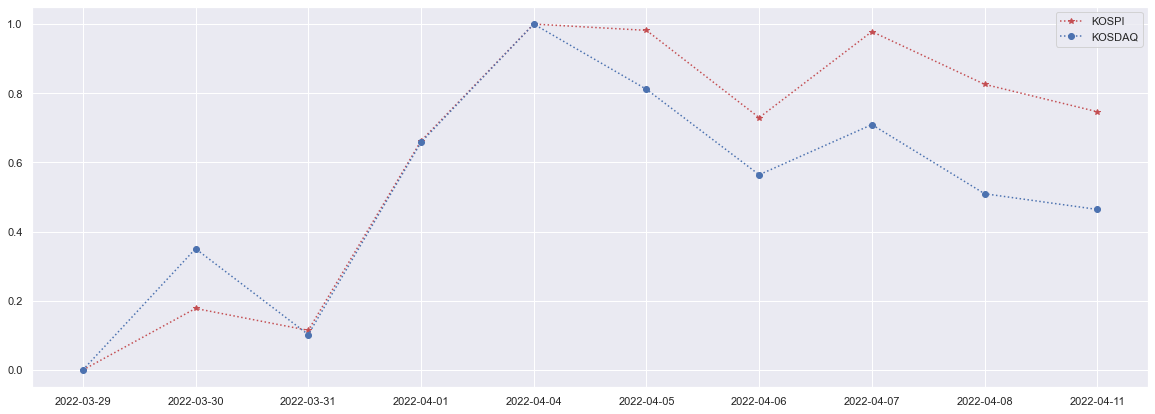

In [24]:
trade_dates = df_kospi["localTradedAt"][::-1]

plt.figure(figsize=(20, 7))
plt.plot(trade_dates, scaled_kospi_cp, "r*:", label='KOSPI')
plt.plot(trade_dates, scaled_kosdaq_cp, "bo:", label="KOSDAQ")
plt.legend()
plt.show()

In [25]:
df_kospi.head()

,localTradedAt,closePrice,compareToPreviousClosePrice,compareToPreviousPrice,fluctuationsRatio,openPrice,highPrice,lowPrice
0,2022-04-11,2687.659912,-12.73,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.47,"2,687.54","2,711.02","2,683.96"
1,2022-04-08,2700.389893,4.53,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.17,"2,706.64","2,712.00","2,685.52"
2,2022-04-07,2695.860107,-39.17,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-1.43,"2,714.70","2,718.50","2,693.36"
3,2022-04-06,2735.030029,-24.17,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.88,"2,739.07","2,747.85","2,730.66"
4,2022-04-05,2759.199951,1.30,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.05,"2,765.50","2,769.18","2,750.50"


In [26]:
DOW_URL = "https://api.stock.naver.com/index/.DJI/price?page=1&pageSize=10"
df_dow = pd.read_json(DOW_URL)
df_dow.head()

,stockExchangeType,localTradedAt,worldIndexSymbol,openPrice,highPrice,lowPrice,closePrice,compareToPreviousClosePrice,fluctuationsRatio,compareToPreviousPrice
0,"{'code': 'NYS', 'zoneId': 'EST5EDT', 'nationTy...",2022-04-08T18:50:36-04:00,.DJI,"34,569.24","34,908.46","34,470.19","34,721.12",137.55,0.40,"{'code': '2', 'text': '상승', 'name': 'RISING'}"
1,"{'code': 'NYS', 'zoneId': 'EST5EDT', 'nationTy...",2022-04-07T17:01:19-04:00,.DJI,"34,439.24","34,705.83","34,190.95","34,583.57",87.06,0.25,"{'code': '2', 'text': '상승', 'name': 'RISING'}"
2,"{'code': 'NYS', 'zoneId': 'EST5EDT', 'nationTy...",2022-04-06T16:54:48-04:00,.DJI,"34,520.34","34,609.84","34,277.17","34,496.51",-144.67,-0.42,"{'code': '5', 'text': '하락', 'name': 'FALLING'}"
3,"{'code': 'NYS', 'zoneId': 'EST5EDT', 'nationTy...",2022-04-05T18:07:06-04:00,.DJI,"34,876.33","35,112.21","34,566.04","34,641.18",-280.70,-0.80,"{'code': '5', 'text': '하락', 'name': 'FALLING'}"
4,"{'code': 'NYS', 'zoneId': 'EST5EDT', 'nationTy...",2022-04-04T17:07:02-04:00,.DJI,"34,799.98","34,940.78","34,615.38","34,921.88",103.61,0.30,"{'code': '2', 'text': '상승', 'name': 'RISING'}"


pandas to_datetime 메소드를 이용해 날짜 형식의 문자열을 날짜 객체로 변환

In [27]:
df_dow["tradeDatetime"] = pd.to_datetime(df_dow["localTradedAt"])
df_dow.head()

,stockExchangeType,localTradedAt,worldIndexSymbol,openPrice,highPrice,lowPrice,closePrice,compareToPreviousClosePrice,fluctuationsRatio,compareToPreviousPrice,tradeDatetime
0,"{'code': 'NYS', 'zoneId': 'EST5EDT', 'nationTy...",2022-04-08T18:50:36-04:00,.DJI,"34,569.24","34,908.46","34,470.19","34,721.12",137.55,0.40,"{'code': '2', 'text': '상승', 'name': 'RISING'}",2022-04-08 18:50:36-04:00
1,"{'code': 'NYS', 'zoneId': 'EST5EDT', 'nationTy...",2022-04-07T17:01:19-04:00,.DJI,"34,439.24","34,705.83","34,190.95","34,583.57",87.06,0.25,"{'code': '2', 'text': '상승', 'name': 'RISING'}",2022-04-07 17:01:19-04:00
2,"{'code': 'NYS', 'zoneId': 'EST5EDT', 'nationTy...",2022-04-06T16:54:48-04:00,.DJI,"34,520.34","34,609.84","34,277.17","34,496.51",-144.67,-0.42,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",2022-04-06 16:54:48-04:00
3,"{'code': 'NYS', 'zoneId': 'EST5EDT', 'nationTy...",2022-04-05T18:07:06-04:00,.DJI,"34,876.33","35,112.21","34,566.04","34,641.18",-280.70,-0.80,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",2022-04-05 18:07:06-04:00
4,"{'code': 'NYS', 'zoneId': 'EST5EDT', 'nationTy...",2022-04-04T17:07:02-04:00,.DJI,"34,799.98","34,940.78","34,615.38","34,921.88",103.61,0.30,"{'code': '2', 'text': '상승', 'name': 'RISING'}",2022-04-04 17:07:02-04:00


In [28]:
df_dow["tradeDatetime"].dt.date

0    2022-04-08
1    2022-04-07
2    2022-04-06
3    2022-04-05
4    2022-04-04
5    2022-04-01
6    2022-03-31
7    2022-03-30
8    2022-03-29
9    2022-03-28
Name: tradeDatetime, dtype: object

In [29]:
df_dow["tradeDatetime"] = df_dow["tradeDatetime"].dt.date


In [ ]:
dow의 종가 (closePrice)를 kospi, kosdaq과 같이 시각화

In [30]:
# closeDatetime
df_dow["closePrice"] = df_dow["closePrice"].str.replace(",", "")
df_dow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stockExchangeType            10 non-null     object 
 1   localTradedAt                10 non-null     object 
 2   worldIndexSymbol             10 non-null     object 
 3   openPrice                    10 non-null     object 
 4   highPrice                    10 non-null     object 
 5   lowPrice                     10 non-null     object 
 6   closePrice                   10 non-null     object 
 7   compareToPreviousClosePrice  10 non-null     float64
 8   fluctuationsRatio            10 non-null     float64
 9   compareToPreviousPrice       10 non-null     object 
 10  tradeDatetime                10 non-null     object 
dtypes: float64(2), object(9)
memory usage: 1008.0+ bytes


In [31]:
trade_dates = df_kospi["localTradedAt"][::-1]
dow_trade_dates = df_dow["tradeDatetime"][::-1]
scaled_dow_price = preprocessing

plt.figure(figsize=(20, 7))
plt.plot(trade_dates, scaled_kospi_cp, "r*:", label='KOSPI')
plt.plot(trade_dates, scaled_kosdaq_cp, "bo:", label="KOSDAQ")
plt.plot(dow_trade_dates, df_dow["closePrice", "go:", label="DOW")

plt.legend()
plt.show()

SyntaxError: invalid syntax (2392624602.py, line 8)

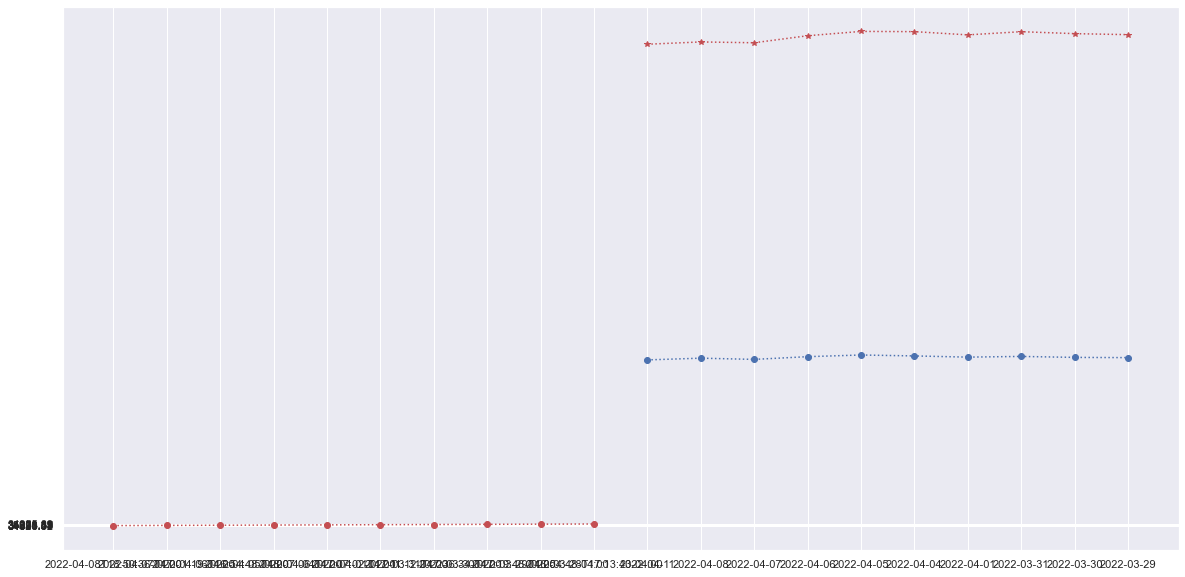

In [32]:
plt.figure(figsize=(20, 10))

plt.plot(df_dow["localTradedAt"], df_dow["closePrice"], "ro:", label="dow")
plt.plot(df_kospi["localTradedAt"], df_kospi["closePrice"], "r*:", label="kospi")
plt.plot(df_kosdaq["localTradedAt"], df_kosdaq["closePrice"], "bo:", label="kosdaq")

plt.show()